In [1]:
import numpy as np

# Quelques opérations matricielles

**Question** Create the following matrix `A` with `arange` and `reshape`

    array([[0, 1],
           [2, 3],
           [4, 5],
           [6, 7],
           [8, 9]])

In [2]:
A = np.arange(10).reshape((5,2))
A

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

**Question** Calculate `A + A` , `A*2`, `A**2`. 

In [3]:
A+A

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [4]:
A*2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14],
       [16, 18]])

In [5]:
A**2

array([[ 0,  1],
       [ 4,  9],
       [16, 25],
       [36, 49],
       [64, 81]])

**Question** Describe the operations.  

*Answer*: 

- A+A adds the 2 arrays. As the 2 arrays have the same dimension, each element of the first array is added to the corresponding element of the second array.

- A*2 multiplies each element of A by 2.

- A**2 squares each element of A.

## A first example of broadcasting

**Question** Create an 1D-array numpy `v1t` containing two values `1` and `2`.

In [64]:
v1t = np.array([1,2])
v1t

array([1, 2])

**Question** Calculate `A+v1t` and interpret the result? 

In [7]:
A+v1t

array([[ 1,  3],
       [ 3,  5],
       [ 5,  7],
       [ 7,  9],
       [ 9, 11]])

*Answer*: Since A and v1t don't have the same shape, v1t is extended to the shape of A. The v1t is initially:
[1, 2] and becomes [[ 1,  2],
       [ 1,  2],
       [ 1,  2],
       [ 1,  2],
       [ 1,  2]]

**Question** Create`v2`, a matrix of 5 rows and 1 column containing numbers from 0 to 4.

In [8]:
v2 = np.arange(5).reshape((5,1))
v2

array([[0],
       [1],
       [2],
       [3],
       [4]])

**Question** Calculate `A+v2` and explain the result? 

In [9]:
A+v2

array([[ 0,  1],
       [ 3,  4],
       [ 6,  7],
       [ 9, 10],
       [12, 13]])

*Answer*: This time v2 is extended to the shape of A. 

## 1d-arrays, nd-arrays and transpose

**Question** Give the names `v3t` and `v4t` to the first two columns of `A`. 

In [10]:
v3t = A[:,0]
v3t

array([0, 2, 4, 6, 8])

In [11]:
v4t = A[:,1]
v4t

array([1, 3, 5, 7, 9])

**Question** Do you obtain columns?

*Answer*: I obtained the values of the columns, in a 1d array.

**Note** 
- Every numpy array has an attribute `T` which corresponds to the transpose view of the array. 
- Be careful! 1d-arrays and nd-arrays have different behavior... 
- Note that the number of square brackets pairs`[]` shows the number of axes.

**Question** Observe the transpose of `A`, `v1t` and `v2`.

In [12]:
A.T

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [13]:
v1t.T

array([1, 2])

In [14]:
v2.T

array([[0, 1, 2, 3, 4]])

**Question** Interpret the results. 

*Answer*: The T attribute returns the transpose view of an array. But for 1d arrays there's no change.

# Matrix multiplications

The matrix multiplication $A$ times $B$ is defined when the number of columns in $A$ equals the number of rows in  $B$. If $A$'s shape is $(n,m)$ and $B$'shape is $(m,p)$ then $C=AB$ has  shape $(n,p)$ and $$C_{i,j} = \sum_{k=1}^m A_{i,k}\times B_{k,j}$$

**Note** Matrix multiplication can be done in several ways in numpy:

**Question** Calculate $v_2^\top A$ and $A^\top v_2$

In [15]:
v2.T@A

array([[60, 70]])

In [16]:
A.T.dot(v2)

array([[60],
       [70]])

**Note** Using the class `np.random.RandomState`, you can create instances to generate pseudo random numbers. You can fix the seed in the instance creation. 

In [17]:
rs = np.random.RandomState(42)

**Question** Create 3x3 matrices `A`, `B` and `C` containing random numbers between 0 and 9.


In [18]:
A = np.random.randint(0, 10, (3,3))
A

array([[6, 8, 2],
       [3, 8, 1],
       [9, 6, 3]])

In [19]:
B = np.random.randint(0, 10, (3,3))
B

array([[7, 8, 0],
       [9, 6, 4],
       [5, 6, 1]])

In [20]:
C = np.random.randint(0, 10, (3,3))
C

array([[7, 7, 6],
       [5, 7, 0],
       [4, 7, 3]])

**Question** Calculate $AB$, $BA$, $A^\top B^\top$, $(BA)^\top$

In [21]:
A@B

array([[124, 108,  34],
       [ 98,  78,  33],
       [132, 126,  27]])

In [22]:
B@A

array([[ 66, 120,  22],
       [108, 144,  36],
       [ 57,  94,  19]])

In [23]:
A.T@B.T

array([[ 66, 108,  57],
       [120, 144,  94],
       [ 22,  36,  19]])

In [24]:
(B@A).T

array([[ 66, 108,  57],
       [120, 144,  94],
       [ 22,  36,  19]])

**Question** Give the identities and the differences.

*Answer*: 
- $A^\top B^\top$ = $(BA)^\top$
- $AB$ != $BA$

**Question** Calculate $(AB)C$, $A(BC)$, $A(B+C)$, $AB+AC$

In [25]:
(A@B)@C

array([[1544, 1862,  846],
       [1208, 1463,  687],
       [1662, 1995,  873]])

In [26]:
A@(B@C)

array([[1544, 1862,  846],
       [1208, 1463,  687],
       [1662, 1995,  873]])

In [27]:
A@(B+C)

array([[214, 220,  76],
       [163, 162,  54],
       [237, 252,  90]])

In [28]:
A@B+A@C

array([[214, 220,  76],
       [163, 162,  54],
       [237, 252,  90]])

**Question** Give the identities.

*Answer*: 
- $(AB)C$ = $A(BC)$, 
- $A(B+C)$ = $AB+AC$

## Scalar product

The scalar product of two vectors of size  $n$ is $$\langle u,v \rangle= \sum_{i=1}^n u_i\times v_i=u^\top v$$


**Question** Create 2 1d-array `v1t` and `v2t` of size 4 of random numbers in the interval $[-9, 10)$ (10 is excluded)

In [66]:
v1t = np.random.randint(-9, 10, 4) 
v1t

array([-4, -8, -3, -3])

In [67]:
v2t = np.random.randint(-9, 10, 4) 
v2t

array([-7,  2, -1,  7])

**Question** Calculate `v1t@v2t`, `v2t@v1t` and conclude 

In [68]:
v1t@v2t

-6

In [69]:
v2t@v1t

-6

*Answer*: Both v1t and v2t are 1D arrays with shape (4,). The dot product of two vectors of the same size sums element-wise products.

**Question** With `reshape` or `newaxis`, create 4x1 matrices  `v1` and `v2` from `v1t` and `v2t`.

In [72]:
v1 = v1t.reshape(4,1)
v1

array([[-4],
       [-8],
       [-3],
       [-3]])

In [73]:
v2 = v2t.reshape(4,1)
v2

array([[-7],
       [ 2],
       [-1],
       [ 7]])

**Question** Now calculate `v1@v2` and `v2@v1`. Conclusion!

In [74]:
v1@v2

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

In [75]:
v2@v1

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

*Answer*: The shape of v1 and v2 are incompatible to do a dot product. The shape is : (4,1) * (4,1)

And dot product shape must be : (n, k) * (k, m) = (n,m)

**Question** Calculate the scalar product using `v1.T` and `v2`. Is the result a scalar?

In [78]:
(v1.T@v2).item()

-6

*Answer*: Now the shape of the 2 matrixes are compatible. (1,4) * (4,1) = (1, 1) The result is a 2D array with 1 element, it's not a scalar. To get a scalar, we use .item().

## Norms (Important)

The $p$-norm of $v$ is defined by $$\Vert v \Vert_p=\big(\sum_{i=1}^n |x_i|^p\big)^{\frac{1}{p}}$$
We often compute the 2-norm and this is the default when $p$ is not given.
$$\Vert v \Vert=\sqrt{\big(\sum_{i=1}^n |x_i|^2\big)}$$
See the doc of `np.linalg.norm`.  

**Question** What is the norm of `v1`.

In [100]:
np.linalg.norm?

**Question** From the previous definitions we have $\langle v,v\rangle = \Vert v\Vert^2$. Double check with `v1`

In [91]:
from numpy import linalg as LA

v1.T.dot(v1)

array([[98]])

In [92]:
LA.norm(v1, 2)**2

98.0

**Question** The norm is like a distance between the extreme points of the vector. It satisfies the triangular inequality: $\Vert u+v\Vert \leq \Vert u\Vert + \Vert v \Vert$. Check the inquality with `v1`and `v2`.

In [93]:
LA.norm(v1+v2, 2)

13.74772708486752

In [94]:
LA.norm(v1, 2) + LA.norm(v2,2)

20.048386501703888

In [95]:
LA.norm(v1+v2, 2) <= LA.norm(v1, 2) + LA.norm(v2,2)

True

**Question** Reading the documentation of `np.linalg.norm`, you have learned that the computation is different when the function is applied on 1d-arrays and nd-arrays. Calculate $p$-norms for $p=1$ and $p=\infty$ on `v1t` using `np.linalg.norm`. Do the same computation with numpy but without this function in order to check that you have perfectly understood what the function is doing on different kind of arrays. (`np.Inf` is $+\infty$)

In [85]:
v1t

array([-4, -8, -3, -3])

In [109]:
LA.norm(v1t, 1) #sum of absolute values

18.0

In [96]:
np.sum(np.abs(v1t))

18

In [110]:
LA.norm(v1t, np.inf) #max absolute value

8.0

In [98]:
np.max(np.abs(v1t))

8

**Question** Now on $A$, what are the  1-norm, the $\infty$-norm and the Froebenius norm?

In [99]:
A

array([[6, 8, 2],
       [3, 8, 1],
       [9, 6, 3]])

In [107]:
LA.norm(A,1) #max column sum of absolute values

22.0

In [103]:
col_sums = np.sum(np.abs(A), axis=0)
np.max(col_sums)  

22

In [106]:
LA.norm(A, np.inf) #max row sum of absolute values

18.0

In [104]:
row_sums = np.sum(np.abs(A), axis=1)
np.max(row_sums)

18

In [108]:
LA.norm(A, 'fro') #sqrt of sum of squares of all elems

17.435595774162696

In [105]:
np.sqrt(np.sum(A**2))

17.435595774162696

# Solving a system of linear equations

We want to solve $$\left \{ \begin{array}{ll}x_2 = 3 x_1\\x_2 = -x_1 +3\end{array} \right .$$

Each equation define a set of points of coordinates $(x_1,x_2)$ by a linear relation between $x_1$ and $x_2$. The conjunction of the 2 equations is therefore the intersection between the 2 sets. We can draw the corresponding graph:

**Question** Draw the two lines 

$$\left \{ \begin{array}{l}x_2 = 3 x_1\\x_2 = -x_1 +3\end{array} \right .$$ 

for $x_2$ in $[0, 3]$. It should be like this:

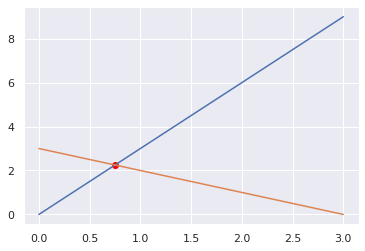

Use `plot` for the lines and  `scatter` for the dot at the intersection (compute the value by hand!). 

In [115]:
# x2 = 3x1 => x2 = -x1 + 3 = 3x1 => 
# 4x1 = 3 => x1 = 0.75 => 
# x2 = 3*0.75 = 2.25

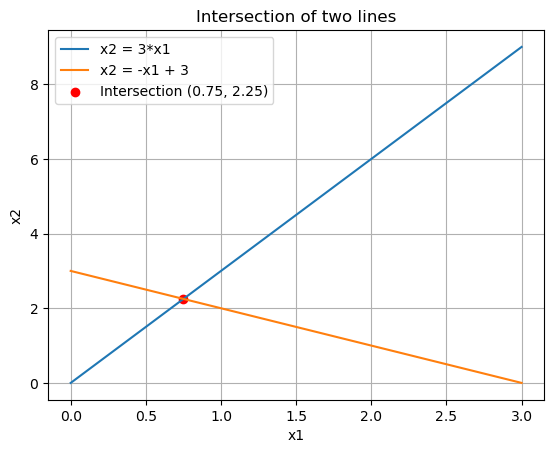

In [122]:
import matplotlib.pyplot as plt


# x1 range (independent variable)
x1 = np.linspace(0, 3, 100)

# Calculate x2 for each line using x1
x2_line1 = 3 * x1           # x2 = 3*x1
x2_line2 = -x1 + 3          # x2 = -x1 + 3

# Plot lines
plt.plot(x1, x2_line1, label='x2 = 3*x1')
plt.plot(x1, x2_line2, label='x2 = -x1 + 3')

# Plot intersection point
plt.scatter(0.75, 2.25, color='red', label='Intersection (0.75, 2.25)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Intersection of two lines')
plt.legend()
plt.grid(True)
plt.show()


**Question** Rewrite the system

$$\left \{ \begin{array}{l}x_2 = 3 x_1\\x_2 = -x_1 +3\end{array} \right .$$ 

under the form $Ax = b$ where $x$ is a (columnwise) vector $(x_1,x_2)$. Create $A$ and $b$.

In [125]:
# x2 = 3x1 => x2 - 3x1 = 3x1 - x2 = 0
# x2 = -x1 + 3 => x1 + x2 = 3 

# =>

# A = [3, -1]  b = [0] 
#     [1, 1]       [3]


A = np.array([[3, -1],
              [1, 1]])
A

array([[ 3, -1],
       [ 1,  1]])

In [132]:
b = np.array([0,3]).reshape(2,1)
b

array([[0],
       [3]])

**Question** Calculate $Ax$ for the column vector $(1, 1)^T$

In [138]:
A @ (np.array([1,1]).reshape(2,1))

array([[2],
       [2]])

**Question** With `np.linalg.inv`, name `Ainv` the matrix inverse of $A$.

In [142]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.25,  0.25],
       [-0.25,  0.75]])

**Question** Calculate the product of `Ainv` by `A`. Conclusion 

In [143]:
Ainv@A

array([[1., 0.],
       [0., 1.]])

*Answer*: Ainv * A returns an identity matrix, which means Ainv is the correct inverse.

**Question** Calculate $x= A^{-1}b$ and then $Ax$. Conclusion. 

In [144]:
x = Ainv@b
x

array([[0.75],
       [2.25]])

In [145]:
A@x

array([[0.],
       [3.]])

*Answer*: x is x1, x2. Ainv @ x gives the solutions for x1 and x2. This is logical because Ax = b => x = A^(-1) * b.

A@x gives b, because Ax = b.

**Questions** Using the geometrical interpretation of what we did, define 2 systems for which the intersection of the 2 equations is either null or not a single point. What can you say about $A^{-1}$ in these cases? 

In [151]:
# If we take 2 parellel lines:

# x2-2x1 = 1
# x2-2x1 = -3

A = np.array([[-2, 1],
              [-2, 1]])

np.linalg.inv(A)

LinAlgError: Singular matrix

*Answer*:  If we take 2 parellel lines:

- x2-2x1 = 1
- x2-2x1 = -3

 then A and b are :

- A = [-2, 1]  b = [1]
-     [-2, 1]      [-3]

A is non-invertable (singular) and no solutions exist since the 2 lines never intersect.

**Note** Everything extends to the case where the number of equations/variables is greater than 2!